In [21]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# Step 2: Load the dataset
df = pd.read_csv('train.csv')  # Make sure train.csv is in the same directory
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Step 3: Data Cleaning
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# Clean missing data
df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0]
}, inplace=True)

# Drop 'Cabin' safely
df.drop(columns=['Cabin'], inplace=True, errors='ignore')


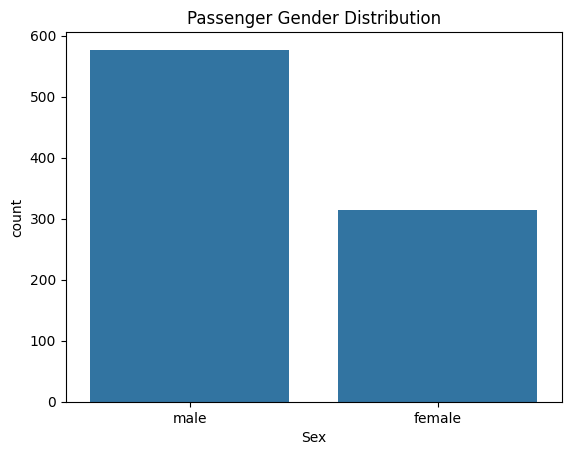

In [25]:
# Step 4A: Univariate Analysis – Gender Distribution
sns.countplot(x='Sex', data=df)
plt.title('Passenger Gender Distribution')
plt.show()

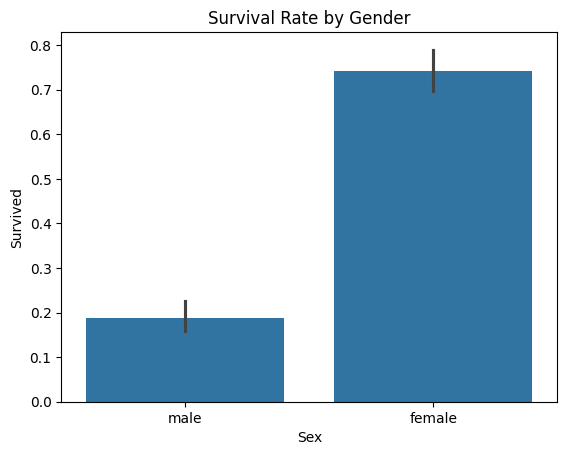

In [26]:
# Step 4B: Bivariate Analysis – Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

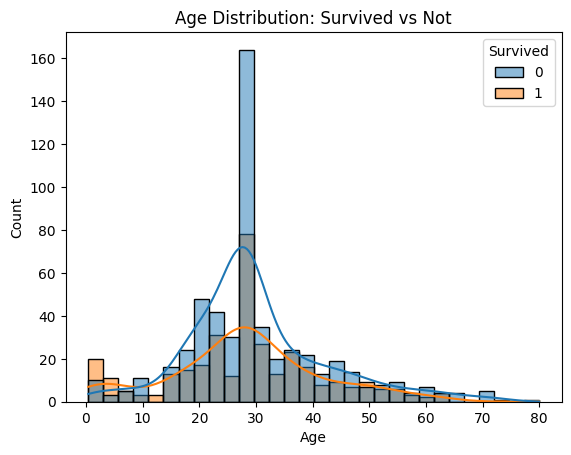

In [27]:
# Step 4C: Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution: Survived vs Not')
plt.show()

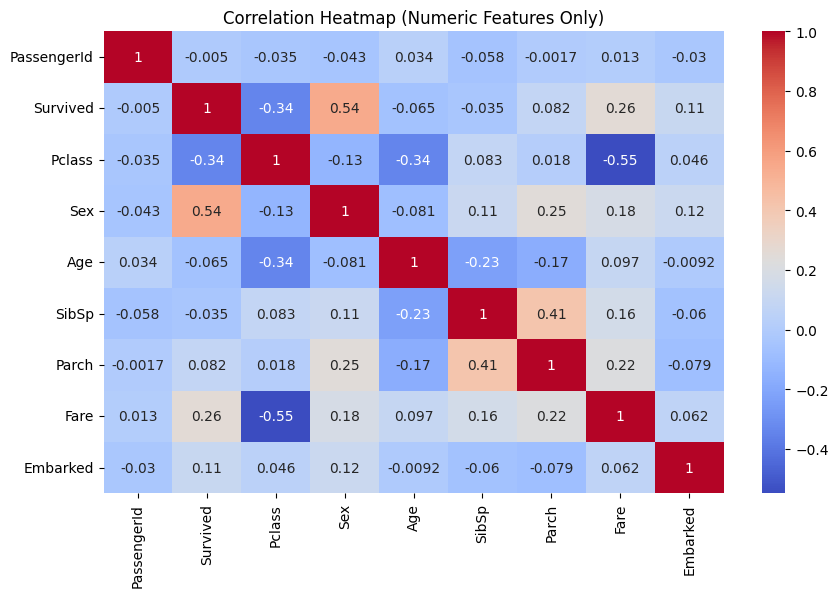

In [28]:
# Encode categorical variables
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select only numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()
